# Root Finding in 1 Dimension
## Christina Lee
## Numerics

When does this value reach zero?

When will I have spent all my money?
When will Siberian tigers go extinct? Will they?
At what altitude do I need to place a satillite to ensure it remains stationary with respect to the surface of the Earth? 
Where will this canon ball hit the ground?

Solving these types of problems involves the application of <i>Root Finding</i>, or determining when a value crosses ze
























0?????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????.

* Graph the function
* Make a graph of the function
* Make sure you have made a graph of the function

* Unknown multiplicity, or does multiplicity 2 even hit 
* many  roots
* pole

http://butler.cc.tut.fi/~piche/numa/lecture0506.pdf


* Midpoint Method
* Newton's Method
* Secant Method

In [1]:
using ForwardDiff
using Statistics
using Plots
gr()

┌ Info: Recompiling stale cache file C:\Users\chris\.julia\compiled\v1.0\ForwardDiff\k0ETY.ji for ForwardDiff [f6369f11-7733-5829-9624-2563aa707210]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file C:\Users\chris\.julia\compiled\v1.0\Plots\ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1190


Plots.GRBackend()

In [18]:
f(x) = 2*cos(x)-x+x^2/10
g(x) = x^2
h(x) = 1/x  

h (generic function with 1 method)

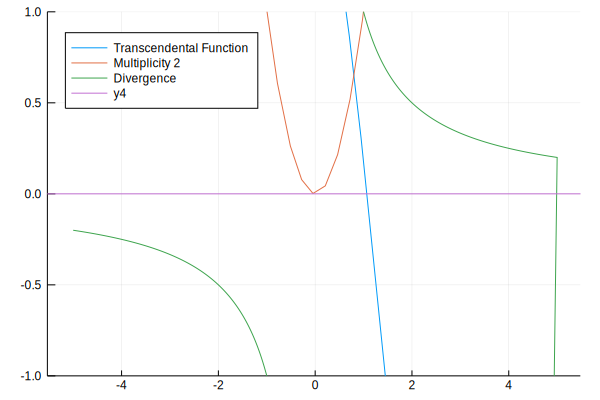

In [36]:
xh=collect(0.01:0.01:5)

plot(f,label="Transcendental Function"
    ,ylims=(-1,1),legend=:topleft)
plot!(g,label="Multiplicity 2")
plot!(vcat(xh,-xh),vcat(h.(xh),h.(-xh)),label="Divergence")
hline!([0])

In [4]:
function Zero_Iterator(f::Function,Method::Function,iterated_values::Array{Float64},params,N)
    
    n_values=zeros(Float64,length(iterated_values),N)
    n_values[:,1]=iterated_values;
    
    for ii in 2:N
        n_values[:,ii] = Method(f,n_values[:,(ii-1)],params)
    end
    return n_values
end


Zero_Iterator (generic function with 1 method)

## Bracketing

<b> Pro </b>
    - Can't be worse than linear
<b> Con </b>
    - Only Linear

<b> Pitfalls </b>
    - Divergences

Bracketing will identify $x=0$ as a zero of $f(x) = 1/x$.  $1/0 \neq 0$, unless you are working in some weird sort of alternative algebra.  But the function alternative signs on either side, so that's good enough for the algorithm.  

In [5]:
function Midpoint(f::Function,endpoints::Array{Float64},params)
    if f(endpoints[1])*f(endpoints[2])>0
        println("Endpoints must bracket a zero.  Please pick better endpoints.")
        error()
    end
    c=mean(endpoints)
    if f(endpoints[1])*f(c)<0
        return [ endpoints[1],c]
        elseif f(c)*f(endpoints[2])<0
        return [c, endpoints[2]]
    else
        println("Mid point doesn't bracket a zero... somethign weird...")
    end
end

Midpoint (generic function with 1 method)

In [6]:
xa=-1.
xb=2.
n=10

10

In [7]:
endpoints=Zero_Iterator(f,Midpoint,[xa,xb],["null"],n)
x_diff_M=endpoints[1,:]-endpoints[2,:];
y_diff_M=f.(endpoints[1,:])-f.(endpoints[2,:]);

In [37]:
endpoints_D_M=Zero_Iterator(h,Midpoint,[xa,xb],["null"],n)
x_diff_M=endpoints[1,:]-endpoints[2,:];
y_diff_M=f.(endpoints[1,:])-f.(endpoints[2,:]);

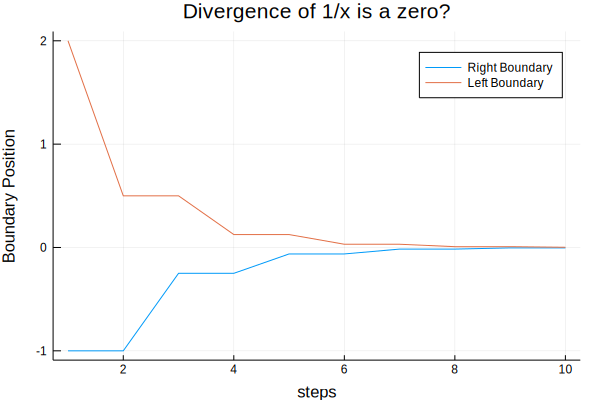

In [42]:
plot(transpose(endpoints_D_M),label=["Right Boundary","Left Boundary"])
plot!(title="Divergence of 1/x is a zero?"
    ,xlabel="steps",ylabel="Boundary Position")

## Newton-Raphson Method

In [8]:
function Newtons(f::Function,x::Array,fp::Array)
    return [ x[1]- f(x[1])/fp[1](x[1]) ]
end

Newtons (generic function with 1 method)

In [9]:
x0=2.

n=10

10

In [44]:
f_prep(x::Vector)=f(x[1])
f_prep2=(x->ForwardDiff.gradient(f_prep,x))
fp(x)=f_prep2(x .*[1.])[1]

g_prep(x::Vector)=g(x[1])
g_prep2=(x->ForwardDiff.gradient(g_prep,x))
gp(x)=g_prep2(x .*[1.])[1]

gp (generic function with 1 method)

In [48]:
x_Newtons=transpose(Zero_Iterator(f,Newtons,[x0],[fp],n))
y_diff_N=f.(x_Newtons)
x_diff_N=x_Newtons.-x_Newtons[end]

10×1 Array{Float64,2}:
  0.9281352793610165   
 -0.07752867854505463  
  0.0010263761236100066
  1.5656622287529842e-7
  3.774758283725532e-15
  0.0                  
  0.0                  
  0.0                  
  0.0                  
  0.0                  

In [47]:
x_Newtons_x2=transpose(Zero_Iterator(g,Newtons,[x0],[gp],n))

10×1 LinearAlgebra.Transpose{Float64,Array{Float64,2}}:
 2.0       
 1.0       
 0.5       
 0.25      
 0.125     
 0.0625    
 0.03125   
 0.015625  
 0.0078125 
 0.00390625

Hmmm... look at x_diff... little faster wouldn't you say? Didn't even have to run that many iterations to reach Float64 accuracy.

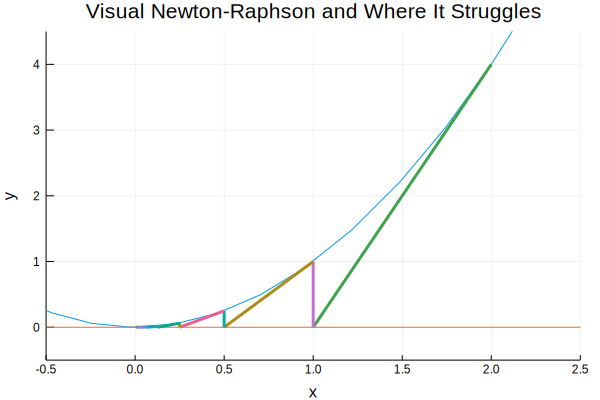

In [59]:
plot(g,
    xlims=(-.5,2.5),ylims=(-.5,4.5),legend=false)
hline!([0])

for ii in 1:9
    plot!(x_Newtons_x2[(0:1).+ii],
        g(x_Newtons_x2[ii]).+gp(x_Newtons_x2[ii]).*(x_Newtons_x2[(0:1).+ii].-x_Newtons_x2[ii])
        ,linewidth=3)
    plot!([x_Newtons_x2[1+ii],x_Newtons_x2[1+ii]],[0,g(x_Newtons_x2[1+ii])],linewidth=3)
end
plot!(title="Visual Newton-Raphson and Where It Struggles",
    xlabel="x",ylabel="y")

## Secant Method

In [13]:
# x[1:2] are last two points
# x[2] more recent and x[1] older
# x[3:4] are f values of last two points
function Secant(f::Function,x::Array,params::Array)
    xnew= x[2] - x[4]*(x[2]-x[1])/(x[4]-x[3])
    return [x[2], xnew, x[4], f(xnew)]
end

Secant (generic function with 1 method)

In [14]:
x0=2.
x1=1.5

n=10

10

In [15]:
x_Secant=Zero_Iterator(f,Secant,[x0,x1,f(x0),f(x1)],["null"],n)
x_diff_S=x_Secant[2,:]-x_Secant[1,:]

10-element Array{Float64,1}:
  -0.5                   
  -0.4363849163049389    
   0.007916427022864214  
   0.0003336224830581269 
  -4.1258247596154263e-7 
   2.0476065287766687e-11
   0.0                   
 NaN                     
 NaN                     
 NaN                     

## Comparison of Results

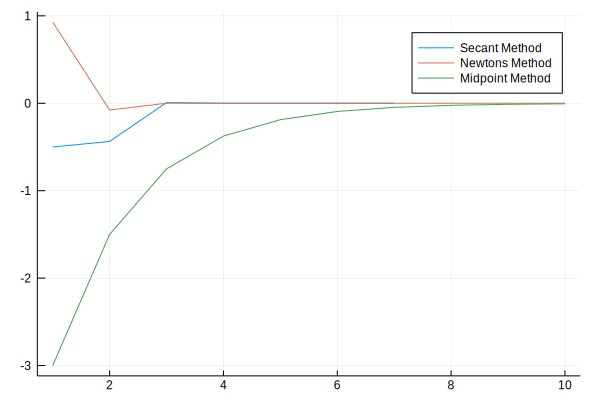

In [16]:
plot(x_diff_S,label="Secant Method")
plot!(x_diff_N,="Newtons Method")
plot!(x_diff_M,label="Midpoint Method")

In [17]:
plot(xNa)
plot!(xSa)

UndefVarError: UndefVarError: xNa not defined